In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
FILE_PATH = "C:/Users/roybo/OneDrive - University College London/PhD/PhD_Prog/007_CNN_Virtual_Contrast/logs/GAN/"

lambda_expts = ["lambda1", "lambda10", "lambda100", "lambda1000"]
aug_expts = ["lambda100", "lambda100NA"]
STN_expts = ["lambda100", "lambda100STN1e-4", "lambda100STN1e-5"]
mu_expts = ["lambda100", "eta1e-4_mu03", "eta1e-4_mu06", "eta1e-4_mu09", "eta3e-5_mu03", "eta3e-5_mu06", "eta3e-5_mu09"]

In [61]:
def get_results(expts):
    results = {}

    for expt in expts:
        results[expt] = {}

        expt_path = f"{FILE_PATH}{expt}/results.json"
        
        with open(expt_path, 'r') as fp:
            data = json.load(fp)
            results[expt]["epochs"] = data["epochs"]

            if isinstance(data["train_L1"][0], list):
                results[expt]["train_focal"] = np.array(data["train_L1"])[:, 0]
                results[expt]["train_global"] = np.array(data["train_L1"])[:, 1]
                results[expt]["val_focal"] = np.array(data["val_L1"])[:, 0]
                results[expt]["val_global"] = np.array(data["val_L1"])[:, 1]

            else:
                results[expt]["train"] = data["train_L1"]
                results[expt]["val"] = data["val_L1"]

    return results

In [62]:
results = {"lambda": get_results(lambda_expts), "aug": get_results(aug_expts), "STN": get_results(STN_expts), "mu": get_results(mu_expts)}

In [63]:
for key, val in results.items():
    print("===============================================")
    print(key)
    for k, v in val.items():
        for kk, vv in v.items():
            if kk != "epochs" and "val" in kk:
                print(k, kk, vv[-1])

lambda
lambda1 val 0.0028411210514605045
lambda10 val 0.002901349449530244
lambda100 val 0.005763425026088953
lambda1000 val 0.002919622464105487
aug
lambda100 val 0.005763425026088953
lambda100NA val 0.0036875123623758554
STN
lambda100 val 0.005763425026088953
lambda100STN1e-4 val 0.003099994268268347
lambda100STN1e-5 val 0.0028338597621768713
mu
lambda100 val 0.005763425026088953
eta1e-4_mu03 val_focal 0.010029823519289494
eta1e-4_mu03 val_global 0.017410682514309883
eta1e-4_mu06 val_focal 0.011244661174714565
eta1e-4_mu06 val_global 0.018112868070602417
eta1e-4_mu09 val_focal 0.01354158204048872
eta1e-4_mu09 val_global 0.018030986189842224
eta3e-5_mu03 val_focal 0.01023949682712555
eta3e-5_mu03 val_global 0.017676232382655144
eta3e-5_mu06 val_focal 0.011299063451588154
eta3e-5_mu06 val_global 0.019432751461863518
eta3e-5_mu09 val_focal 0.012973695993423462
eta3e-5_mu09 val_global 0.019590476527810097


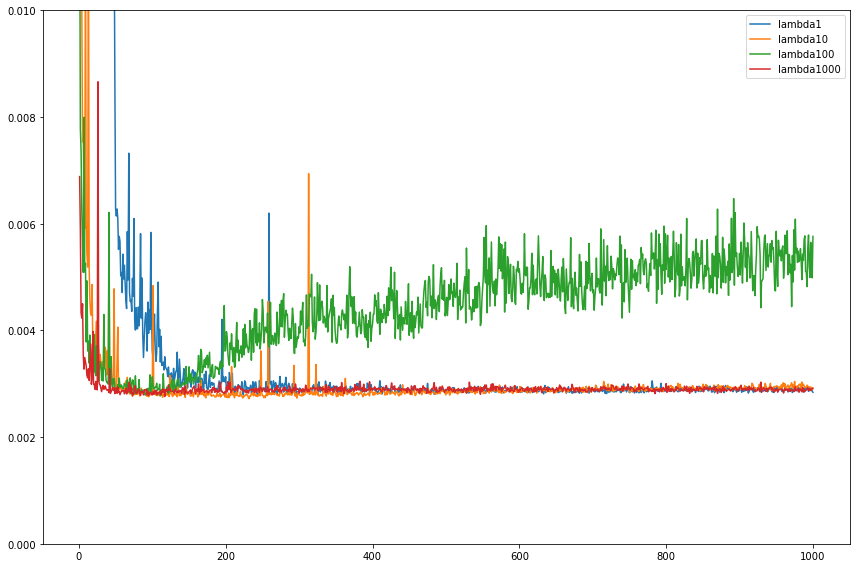

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for key, val in results["lambda"].items():
    ax.plot(val["epochs"], val["val"], label=key)

plt.ylim([0, 0.01])
plt.tight_layout()
plt.legend()
plt.show()

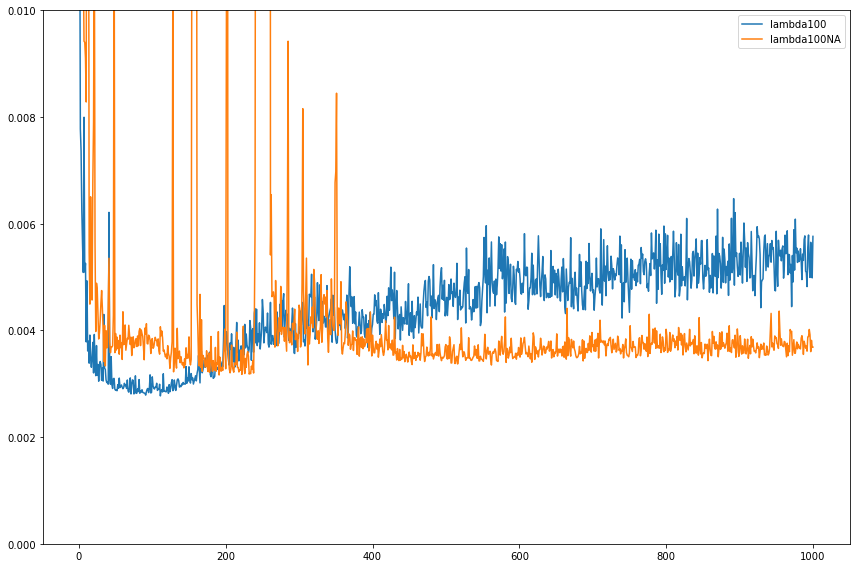

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for key, val in results["aug"].items():
    ax.plot(val["epochs"], val["val"], label=key)

plt.ylim([0, 0.01])
plt.tight_layout()
plt.legend()
plt.show()

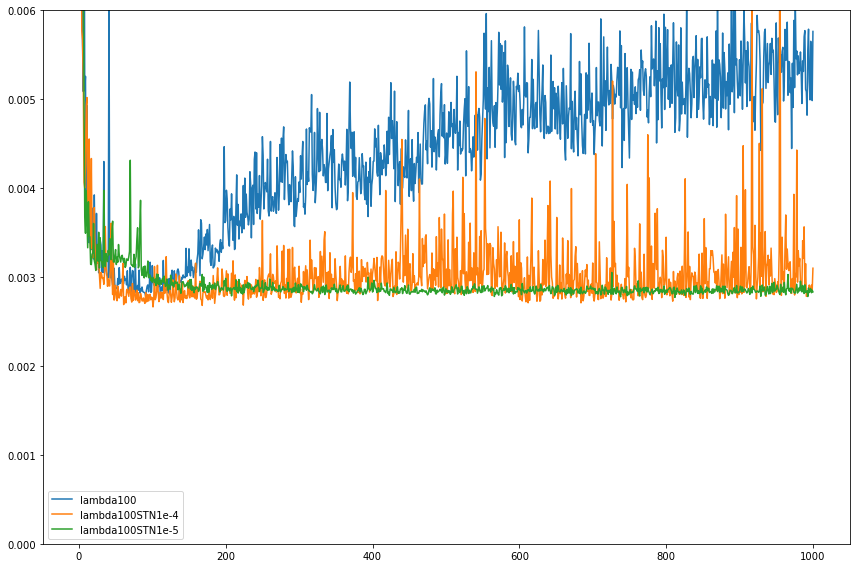

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for key, val in results["STN"].items():
    ax.plot(val["epochs"], val["val"], label=key)

plt.ylim([0, 0.006])
plt.tight_layout()
plt.legend()
plt.show()

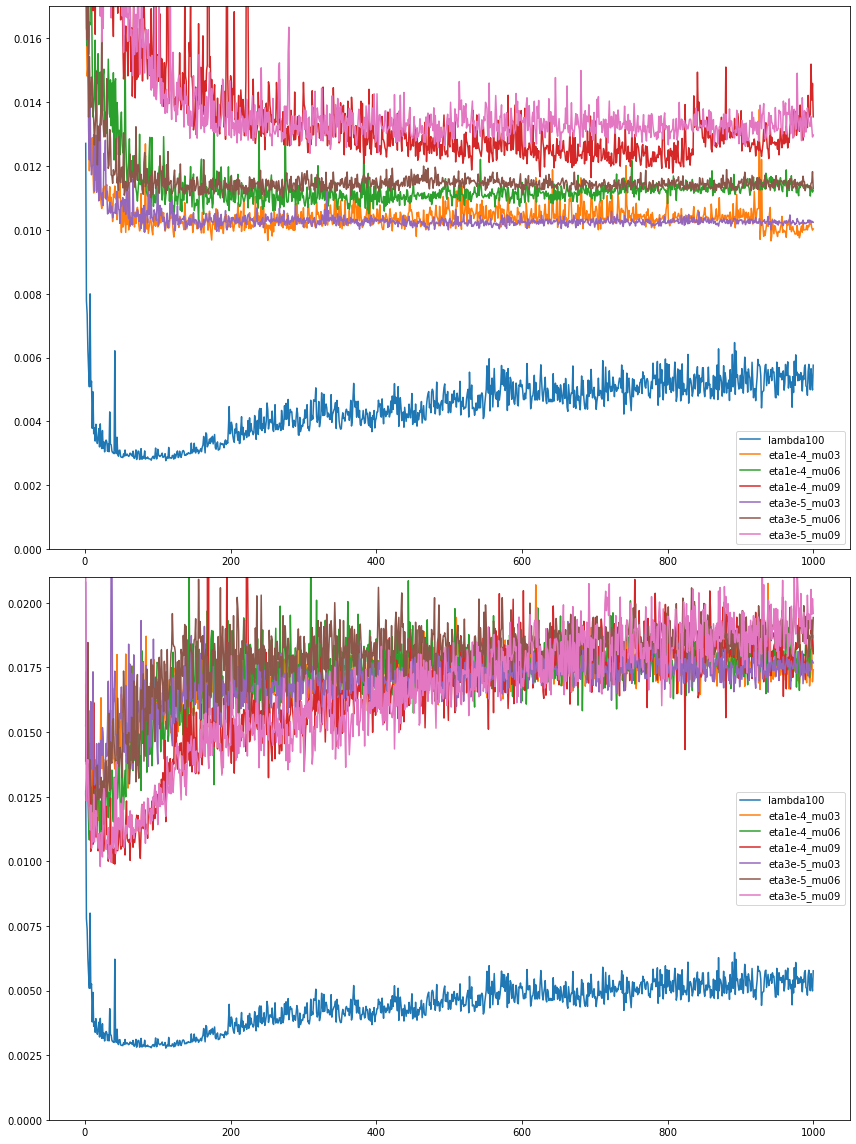

In [67]:
fig, axs = plt.subplots(2, 1, figsize=(12, 16))

for key, val in results["mu"].items():
    try:
        axs[0].plot(val["epochs"], val["val_focal"], label=key)
    except KeyError:
        axs[0].plot(val["epochs"], val["val"], label=key)
    else:
        axs[0].legend()
        axs[0].set_ylim([0, 0.017])

    try:
        axs[1].plot(val["epochs"], val["val_global"], label=key)
    except KeyError:
        axs[1].plot(val["epochs"], val["val"], label=key)
    else:
        axs[1].legend()
        axs[1].set_ylim([0, 0.021])

plt.tight_layout()
plt.show()